**SUBMISSION INSTRUCTIONS**

It is recommendend that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, **RENAME** the file as **rollno_name.ipynb**

**Submission Deadline : 9/12/2025 Tuesday EOD i.e before 11:59 PM**

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week0

**Github Submission repo** -
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week0

#**Assignment 1**
#**Section 1 (Python)**
#**Problem 1**
In this problem, you will implement a class that represents a data sample with numerical features.  
##  Problem Statement
Create a class named **`DataSample`** that stores:

- A list of numeric **features**
- A string **label**

You must implement the following **three methods** with **exact names** (do NOT rename them):

| Method | Description |
|--------|------------|
| `__init__(self, features, label)` | Initializes object attributes |
| `min_max_norm(self)` | Apply min-max normalization **in-place** |
| `scaled(self, factor)` | Return a **new list** with each feature multiplied by `factor` |

### Min–Max Normalization Formula

![Alt text for the image](https://miro.medium.com/v2/resize:fit:964/1*OnCBKS-Thqa43qNslohDpA.png)


###  Edge Case
If **all features are equal**, then max = min → division by zero.  
Handle this condition by setting all normalized values to **0**.

---

### Your output must behave conceptually like this (not real execution here):
```python
sample = DataSample([10, 20, 30], "cat")
sample.min_max_norm()
print(sample.features)   # expected -> [0.0, 0.5, 1.0]

print(sample.scaled(2))  # expected -> [0.0, 1.0, 2.0]


**Sample Class**

In [2]:
class DataSample:
    def __init__(self, features, label):
        """
        Initialize the object with feature list and label string.
        """
        self.features = features
        self.label = label

    def min_max_norm(self):
        """
        Apply min-max normalization:
        Modify self.features in-place.
        Handle case where max == min.
        """
        if not self.features:
            return

        min_val = min(self.features)
        max_val = max(self.features)

        if max_val == min_val:
            # Handle edge case: all features are equal
            self.features = [0.0] * len(self.features)
        else:
            # Apply min-max normalization
            self.features = [
                (feature - min_val) / (max_val - min_val)
                for feature in self.features
            ]

    def scaled(self, factor):
        """
        Return a NEW list of features where each element is multiplied by factor.
        """
        return [feature * factor for feature in self.features]

You can check if your code is working correctly using the sample case below

In [3]:
sample = DataSample([3.5, -2.0, 3.5, 10.0, 0.0], "bird")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After min-max normalization:", sample.features)

scaled_output = sample.scaled(4.2)
print("After scaling x 4.2 (new list expected):", scaled_output)

# Expected Output:
# Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
# Label: bird
# After min-max normalization: [0.4583, 0.0, 0.4583, 1.0, 0.1667]  (approx values)
# After scaling x 4.2: [1.92486, 0.0, 1.92486, 4.2, 0.70014]

Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
Label: bird
After min-max normalization: [0.4583333333333333, 0.0, 0.4583333333333333, 1.0, 0.16666666666666666]
After scaling x 4.2 (new list expected): [1.925, 0.0, 1.925, 4.2, 0.7]


#**Problem 2**
Sort Based on Unique Character Count

Write a function named **`sort_by_unique_chars`** that sorts a list of strings based on the number of **unique characters** in each string (**descending** order).  
If two strings have the same number of unique characters, sort them **alphabetically**.

Assume that the characters in the words are only consisting of lower-case english alphabets

### Function Definition (DO NOT CHANGE THIS NAME)

```python
def sort_by_unique_chars(words):
  pass

In [3]:
def sort_by_unique_chars(words):
  return sorted(words, key=lambda w: (-len(set(w)), w))

check your code by running the below block

In [4]:
#example case
input_data = ["apple", "banana", "kiwi", "grape", "mango"]
output = sort_by_unique_chars(input_data)
print(output)
# Expected Output:
# ['grape', 'mango', 'apple', 'banana', 'kiwi']

['grape', 'mango', 'apple', 'banana', 'kiwi']


# **Section 2 (NumPy)**
# **Problem 1**

In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

## **Problem Statement**

1. **Generate** a 10×10 NumPy array `X` containing random integers between **0 and 100** (inclusive).

2. Create a **boolean mask** selecting all values between **20 and 50** (inclusive).   
   Using this mask, replace those values in `X` with **−1** *in-place*.

3. Extract a **6×6 submatrix** `sub` from the modified `X`:
   - Rows **2 to 8** ( 8 excluded )
   - Columns **3 to 9** ( 9 excluded )

4. Using **advanced NumPy indexing**, extract all **diagonal elements** of the 6×6 submatrix `sub` into a 1D array `diag_vals`.  
   *Hint: use* `np.arange(6)`.

5. Construct a **10×10 structured matrix** `M` using broadcasting, where:

    `M[i, j] = (i - j)²`

    for all `0 ≤ i, j < 10`. This must be done **without loops**.


In [6]:
import numpy as np

# Ensure full arrays are printed (no truncation)
np.set_printoptions(threshold=np.inf)

# 1) Generate 10x10 array X with random integers in [0, 100]
X = np.random.randint(0, 101, size=(10, 10))
print("Original X (10x10):\n", X, "\n")

# 2) Boolean mask for values between 20 and 50 inclusive, replace with -1 in-place
mask = (X >= 20) & (X <= 50)
X[mask] = -1
print("Modified X after replacing [20, 50] with -1:\n", X, "\n")

# 3) Extract 6x6 submatrix: rows 2..7, cols 3..8
sub = X[2:8, 3:9]
print("Submatrix (6x6):\n", sub, "\n")

# 4) Extract diagonal elements using advanced indexing
idx = np.arange(6)
diag_vals = sub[idx, idx]
print("Diagonal values of sub:\n", diag_vals, "\n")

# 5) Construct 10x10 structured matrix M with broadcasting: M[i, j] = (i - j)**2
i = np.arange(10)[:, None]
j = np.arange(10)[None, :]
M = (i - j) ** 2
print("Structured matrix M (10x10):\n", M)

Original X (10x10):
 [[ 61  63  48  56  22  75  59   8  11  96]
 [  2  85  22  29  62  24  72   9  73   5]
 [ 52   6  37  38  80   5  26  79  20  44]
 [ 55   5  23  48  29  78  32  92   0  64]
 [ 32  10  65  94  71   2  71  16  34  80]
 [ 43  54  94  15  75  69   7  83  82  68]
 [ 30  22 100  50  90  95   9   7  52  12]
 [ 41  76  30  21  58  68  71  58  45  54]
 [ 95  38  68  90  60  86  44  90  93  34]
 [  0  97  66  44  31  54  46  70  91  28]] 

Modified X after replacing [20, 50] with -1:
 [[ 61  63  -1  56  -1  75  59   8  11  96]
 [  2  85  -1  -1  62  -1  72   9  73   5]
 [ 52   6  -1  -1  80   5  -1  79  -1  -1]
 [ 55   5  -1  -1  -1  78  -1  92   0  64]
 [ -1  10  65  94  71   2  71  16  -1  80]
 [ -1  54  94  15  75  69   7  83  82  68]
 [ -1  -1 100  -1  90  95   9   7  52  12]
 [ -1  76  -1  -1  58  68  71  58  -1  54]
 [ 95  -1  68  90  60  86  -1  90  93  -1]
 [  0  97  66  -1  -1  54  -1  70  91  -1]] 

Submatrix (6x6):
 [[-1 80  5 -1 79 -1]
 [-1 -1 78 -1 92  0]
 [94 71

# **Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples.
You will practice row-wise normalization, broadcasting, and boolean masking.

## **Problem Statement**

1. Create a NumPy array `scores` of shape 5×4 containing integer values between **0 and 20** (inclusive).  
   Each row represents a sample, and each column represents a score for one of the 4 classes.

2. For each row in `scores`, subtract the **maximum value of that row** from all elements in that row.  
   This operation must be performed using **broadcasting** (no loops allowed).

   *Hint:*  
   `scores.max(axis=1, keepdims=True)` produces a (5×1) column of row-wise maxima.

3. Compute a new array `exp_scores` by applying the exponential function to each element:

   `exp_scores = np.exp(shifted_scores)`

4. **Normalize each row** of `exp_scores` so that each row sums to **1**.  
   Store the resulting array in `probs`.  

   The transformation is conceptually shown by the formula:

   <img src="https://miro.medium.com/v2/resize:fit:300/1*bol3L-WNVacCscvG-rlypQ.png" width="250"/>

   Which corresponds to:

   `probs[i, j] = exp_scores[i, j]/sum(exp_scores[i, :])`

5. Compute the **predicted class** for each sample by taking the index of the largest value in each row of `probs`.  
   Store this in a 1D array `y_pred` of length 5.

6. Create a NumPy array `y_true` of length 5 containing the true class labels (each between 0 and 3).

7. Create a boolean array `correct_mask` indicating whether each predicted label matches the true label.  
   Then compute the **accuracy** using:

   `accuracy = correct_mask.mean()`


In [10]:
import numpy as np

# 1) Create scores array of shape 5×4 with integers 0–20
scores = np.random.randint(0, 21, size=(5, 4))
print("Original scores:\n", scores, "\n")

# 2) Subtract row-wise maximum using broadcasting
row_max = scores.max(axis=1, keepdims=True)   # shape (5,1)
shifted_scores = scores - row_max
print("Shifted scores (scores - row max):\n", shifted_scores, "\n")

# 3) Apply exponential
exp_scores = np.exp(shifted_scores)
print("exp_scores:\n", exp_scores, "\n")

# 4) Normalize each row → softmax probabilities
row_sums = exp_scores.sum(axis=1, keepdims=True)  # shape (5,1)
probs = exp_scores / row_sums
print("Softmax probabilities:\n", probs, "\n")

# 5) Predicted classes (index of max prob per row)
y_pred = probs.argmax(axis=1)
print("Predicted classes (y_pred):\n", y_pred, "\n")

# 6) True labels (random integers between 0 and 3)
y_true = np.random.randint(0, 4, size=5)
print("True labels (y_true):\n", y_true, "\n")

# 7) Boolean correctness mask + accuracy
correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()

print("Correct mask:\n", correct_mask)
print("Accuracy:", accuracy)

Original scores:
 [[ 8 15 16 10]
 [18 15  0  8]
 [18 10  2 14]
 [14 19 13 13]
 [12  1  1 16]] 

Shifted scores (scores - row max):
 [[ -8  -1   0  -6]
 [  0  -3 -18 -10]
 [  0  -8 -16  -4]
 [ -5   0  -6  -6]
 [ -4 -15 -15   0]] 

exp_scores:
 [[3.35462628e-04 3.67879441e-01 1.00000000e+00 2.47875218e-03]
 [1.00000000e+00 4.97870684e-02 1.52299797e-08 4.53999298e-05]
 [1.00000000e+00 3.35462628e-04 1.12535175e-07 1.83156389e-02]
 [6.73794700e-03 1.00000000e+00 2.47875218e-03 2.47875218e-03]
 [1.83156389e-02 3.05902321e-07 3.05902321e-07 1.00000000e+00]] 

Softmax probabilities:
 [[2.44739316e-04 2.68389249e-01 7.29557619e-01 1.80839254e-03]
 [9.52532919e-01 4.74238216e-02 1.45070571e-08 4.32449276e-05]
 [9.81690284e-01 3.29320403e-04 1.10474688e-07 1.79802847e-02]
 [6.66005465e-03 9.88439751e-01 2.45009718e-03 2.45009718e-03]
 [1.79861992e-02 3.00400117e-07 3.00400117e-07 9.82013200e-01]] 

Predicted classes (y_pred):
 [2 0 0 1 3] 

True labels (y_true):
 [2 0 1 3 0] 

Correct mask:
 [ 

#Section 3 - Pandas and MatPlotLib


#Creating Batches for Training and Testing Using Pandas

Download the following .csv file from the given link directly using commands in colab - url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

In [15]:
!wget -O StudentsPerformance.csv "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

--2025-12-09 15:45:44--  https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57021 (56K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  55.68K  --.-KB/s    in 0.04s   

2025-12-09 15:45:45 (1.37 MB/s) - ‘StudentsPerformance.csv’ saved [57021/57021]



In [17]:
import pandas as pd

Import the csv file as a dataframe

In [18]:
df = pd.read_csv("StudentsPerformance.csv")

Write the command to be able to see the first 5 rows

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Create multiple dataframes with the following columns sorted : gender, race, math, reading and writing scores.

(meaning create df1, df2, df3 etc. with the math score sorted in df1, gender wise sorted in df2 etc.)

In [21]:
# gender
df1 = df.sort_values(by='gender')

In [22]:
# race/ethnicity
df2 = df.sort_values(by='race/ethnicity')

In [23]:
# math
df3 = df.sort_values(by='math score')

In [24]:
# reading
df4 = df.sort_values(by='reading score')

In [25]:
# writing
df5 = df.sort_values(by='writing score')

In [26]:
df1.head(), df2.head(), df3.head(), df4.head(), df5.head()

(     gender race/ethnicity parental level of education         lunch  \
 0    female        group B           bachelor's degree      standard   
 563  female        group D                some college  free/reduced   
 566  female        group E           bachelor's degree  free/reduced   
 567  female        group D             master's degree  free/reduced   
 572  female        group C                some college      standard   
 
     test preparation course  math score  reading score  writing score  
 0                      none          72             72             74  
 563               completed          63             80             80  
 566               completed          92            100            100  
 567               completed          61             71             78  
 572                    none          53             62             56  ,
      gender race/ethnicity parental level of education         lunch  \
 778  female        group A                some 

Create 2 non-overlapping dataframes test_df and train_df such that 20% of the rows are in test_df and the rest in train_df

In [27]:
test_df = df.sample(frac=0.2, random_state=42)

In [30]:
train_df = df.drop(test_df.index)

Plot a bar graph such that you can see the distribution of race in test and train dataset. Are the proportions of races almost same in train and test datasets ? If not what can you do so that the proportions of races in the test and train datasets are close ?


Hint : Think Sorting on the race/ethnicity column and then applying some logic.

In [ ]:
# to clarify if the split of races A, B, C, D and E are nearly say 0.2, 0.15, 0.25, 0.17, 0.23
# then I expect an almost similar split in the train_df and test_df

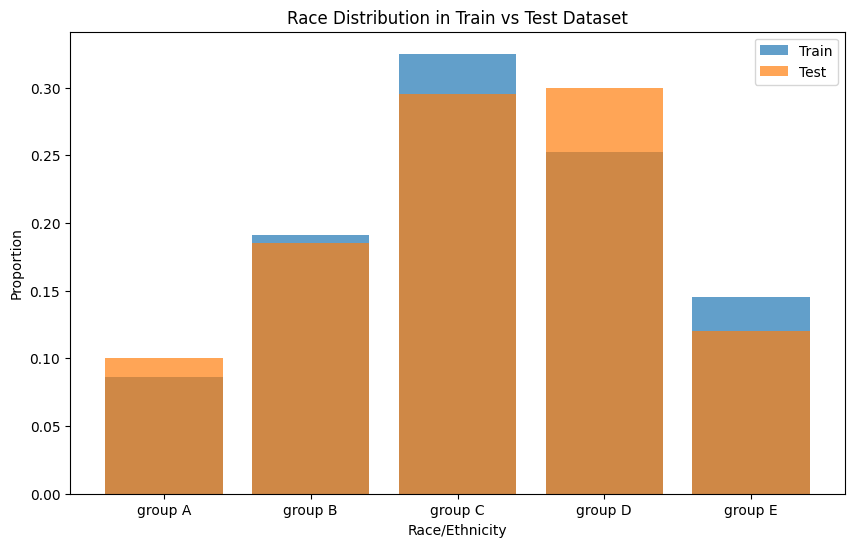

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("StudentsPerformance.csv")

# 80-20 random split
test_df = df.sample(frac=0.2, random_state=42)
train_df = df.drop(test_df.index)

# Compute proportions
train_props = train_df['race/ethnicity'].value_counts(normalize=True).sort_index()
test_props  = test_df['race/ethnicity'].value_counts(normalize=True).sort_index()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(train_props.index, train_props.values, alpha=0.7, label='Train')
plt.bar(test_props.index, test_props.values, alpha=0.7, label='Test')

plt.xlabel("Race/Ethnicity")
plt.ylabel("Proportion")
plt.title("Race Distribution in Train vs Test Dataset")
plt.legend()
plt.show()

Even if it the proportions are almost same think of a way to create the train_df and test_df to have similar proportions of races.

In [32]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

train_parts = []
test_parts = []

# Loop through each race category
for race, group in df.groupby("race/ethnicity"):

    # take 20% from this group for test set
    test_group = group.sample(frac=0.2, random_state=42)

    # take the remaining 80% for train
    train_group = group.drop(test_group.index)

    test_parts.append(test_group)
    train_parts.append(train_group)

# Combine all pieces
test_df = pd.concat(test_parts).sample(frac=1, random_state=42)   # shuffle
train_df = pd.concat(train_parts).sample(frac=1, random_state=42)

Usually when we train machine learning models we use batches. Each batch is a subset of train_df of legth batch_size. Create Batches: a list of batch each of size 50 from the train_df

In [33]:
batch_size = 50

In [34]:
batches = [
    train_df.iloc[i : i + batch_size]
    for i in range(0, len(train_df), batch_size)
]

Print the size of Batches and first few rows of Batches[0]

In [35]:
print("Number of batches:", len(batches))
print("\nFirst few rows of batches[0]:")
print(batches[0].head())

Number of batches: 16

First few rows of batches[0]:
     gender race/ethnicity parental level of education         lunch  \
79   female        group E             master's degree      standard   
910    male        group D           bachelor's degree  free/reduced   
936    male        group A          associate's degree      standard   
268  female        group D          associate's degree      standard   
974  female        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
79                     none          62             68             68  
910                    none          50             42             48  
936                    none          67             57             53  
268               completed          88             92             95  
974                    none          54             63             67  
